In [ ]:
import pandas as pd

In [ ]:
### Google colab import

from google.colab import drive
drive.mount('/content/drive')

applications = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Homework_5/applications(2.0).csv')
industries = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Homework_5/industries(2.0).csv')

print(f"Industries count in applications : {applications['Industry'].unique().shape[0]}")
print(f"Industries count in industries : {industries['Industry'].unique().shape[0]}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Industries count in applications : 37
Industries count in industries : 37


In [ ]:
# Translate ukranian columns to english : gender, education level, location, industry


applications.loc[:,'Gender'] = applications['Gender'].replace({'Чоловік': 'Male', 'Жінка': 'Female'})

applications.loc[:,'Education level'] = applications['Education level'].replace({'Вища (бакалавр, спеціаліст, магістр)' : 'Higher education (bachelor, specialist, master)',
                                                                           'Ще студент вишу':'Still a university student',
                                                                           'Середня спеціальна':'Secondary special',
                                                                           'Середня':'Middle School','Дві вищі':'Two Higher'})

applications.loc[:,'Location']  = applications['Location'].replace({'Івано-Франківськ чи область': 'Ivano-Frankivsk or region',
                                                              'Київ чи область':'Kyiv or region',
                                                              'Львів чи область':'Lviv or region',
                                                              'Житомир чи область':'Zhytomyr or region',
                                                              'Дніпро чи область':'Dnipro or region','Тернопіль чи область':'Ternopil or region',
                                                              'Вінниця чи область':'Vinnytsia or region', 'Кропивницький чи область':'Kropyvnytskyi or region',
                                                              'Чернігів чи область': 'Chernihiv or region', 'Харків чи область': 'Kharkiv or region',
                                                              'Рівне чи область': 'Rivne or region', 'Запоріжжя чи область': 'Zaporizhzhya or region',
                                                              'Чернівці чи область': 'Chernivtsi or region', 'Суми чи область': 'Sumy or region',
                                                              'Одеса чи область': 'Odesa or region',
                                                              'Черкаси чи область' : 'Cherkasy or region' ,'Луцьк чи Волинська область' : 'Lutsk or Volyn region',
                                                              'Ужгород чи Закарпатська область' : 'Uzhhorod or Transcarpathian region', 'Полтава чи область' : 'Poltava or region',
                                                              'Хмельницький чи область':'Khmelnytskyi or region', 'Миколаїв чи область':'Mykolaiv or region', 'Херсон чи область':'Kherson or region',
                                                              'Донецька чи Луганська область': 'Donetsk or Luhansk region'})

applications.loc[:,'Industry'] = applications['Industry'].astype(str)
applications.loc[:,'Industry'] = applications['Industry'].replace({'Інша': 'Other'})

print(f"Industries count in applications : {applications['Industry'].unique().shape[0]}")
print(f"Industries count in industries : {industries['Industry'].unique().shape[0]}")
print("---------------------------------------------")

industries.loc[:,'Industry']  = industries['Industry'].astype(str)
industries.loc[:,'Industry']  = industries['Industry'].replace({'Інша': 'Other'})

print(f"Industries count in applications : {applications['Industry'].unique().shape[0]}")
print(f"Industries count in industries : {industries['Industry'].unique().shape[0]}")


Industries count in applications : 37
Industries count in industries : 37
---------------------------------------------
Industries count in applications : 37
Industries count in industries : 37


In [ ]:

total_applications = applications.shape[0]
print(f"Total applications : {total_applications}")


Total applications : 13315


In [ ]:

# 1.1 Remove duplicate values ​​in applicant_id column

applications = applications.drop_duplicates(subset='applicant_id')

print(f"Total unique applications : {applications.shape[0]}")


Total unique applications : 13278


In [ ]:
# 1.2 External rating cleaning

applications.loc[:,'External Rating'] = applications['External Rating'].fillna(0)


In [ ]:
# 1.3 Education level fill

applications.loc[:,'Education level'] = applications['Education level'].fillna('Middle School')


In [ ]:
# 2. Merging data from both tables

# Make sure there is no inconsistencies in typo

merged_data = applications.merge(industries, on='Industry', how='left')

print(f"Rows with NaN score for industries: {industries['Score'].isna().sum()}")

print(f"Data shape after merge : {merged_data.shape[0]}")

print(f"Rows with NaN score after merge : {merged_data['Score'].isna().sum()}")

merged_data.tail(5)

Rows with NaN score for industries: 0
Data shape after merge : 13278
Rows with NaN score after merge : 0


,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score
13273,01.09.2023 11:01,12000.0,25,Male,Medtech / Healthcare,Single,6.0,"Higher education (bachelor, specialist, master)",Kharkiv or region,01908b949a6a1eb44d1ee013ec377f9d,15
13274,01.09.2023 11:14,10500.0,28,Male,Blockchain,Married,5.0,"Higher education (bachelor, specialist, master)",NaN,6599ba629cfcfe8ac42c7d31c13f62de,0
13275,01.09.2023 11:19,5790.0,25,Male,Blockchain,Married,3.0,"Higher education (bachelor, specialist, master)",Dnipro or region,e57f181bec5b11870a541c43d9b960f7,0
13276,01.09.2023 11:28,13500.0,31,Male,Mobile,Single,8.0,Middle School,Odesa or region,a340c62a1226509949ef60df10a7d726,15
13277,01.09.2023 11:38,12600.0,32,Male,High Load Systems,Married,11.0,"Higher education (bachelor, specialist, master)",NaN,a36a922c50b554cad6cd0eb98a5eaad8,15


In [ ]:
# 3. Calculating application points

# Creating an empty column for application points

merged_data['Application Points'] = 0

print(f"Rows with NaN application points at step 0 : {merged_data['Application Points'].isna().sum()}")

### How To Calculate Application Points

# 1.If the applicant is between 35 and 55 years old, 20 points are added to the score.

merged_data.loc[(merged_data['Age'] >= 35) & (merged_data['Age'] <= 55), 'Application Points'] += 20

print(f"Rows with NaN application points at step 1 : {merged_data['Application Points'].isna().sum()}")

# 2.If the application is not made during the weekend, 20 points will be added to the score.

merged_data['Applied at'] = pd.to_datetime(merged_data['Applied at'], format="mixed")

merged_data.loc[merged_data['Applied at'].dt.dayofweek < 5, 'Application Points'] += 20

print(f"Rows with NaN application points at step 2 : {merged_data['Application Points'].isna().sum()}")

# 3.If the applicant is married, 20 points are added to the score.

merged_data.loc[merged_data['Marital status'] == 'Married', 'Application Points'] += 20

print(f"Rows with NaN application points at step 3 : {merged_data['Application Points'].isna().sum()}")

# 4.If the applicant is located in Kyiv or its surrounding area, 10 points are added to the score.

merged_data.loc[merged_data['Location'].str.contains('Kyiv or region',na=False),'Application Points'] += 10

print(f"Rows with NaN application points at step 4 : {merged_data['Application Points'].isna().sum()}")

# 5.The 'Score' value from the industries.csv table is also added to the application (between 0 and 20 points).

#merged_data['Score'] = merged_data['Score'].fillna(0)
merged_data['Application Points'] += merged_data['Score']

print(f"Rows with NaN application points at step 5 : {merged_data['Application Points'].isna().sum()}")

# 6.If the 'External Rating' is 7 or greater, 20 points are added to the score

merged_data.loc[merged_data['External Rating'] >= 7, 'Application Points'] += 20

print(f"Rows with NaN application points at step 6 : {merged_data['Application Points'].isna().sum()}")

# 7. If the 'External Rating' is 7 or greater, 20 points are added to the score

merged_data.loc[merged_data['External Rating'] <= 2, 'Application Points'] -= 20

print(f"Rows with NaN application points at step 7 : {merged_data['Application Points'].isna().sum()}")

# If Amount is null or External Rating = 0 Then 0 application points

merged_data.loc[(merged_data['Amount'].isnull()) | (merged_data['External Rating'] == 0), 'Application Points'] = 0

print(f"Rows with NaN application points at step 8 : {merged_data['Application Points'].isna().sum()}")

# Values should be between 0-100

merged_data.loc[merged_data['Application Points'] > 100, 'Application Points'] = 100
merged_data.loc[merged_data['Application Points'] <= 0, 'Application Points'] = 0

print(f"Rows with NaN application points at step 9 : {merged_data['Application Points'].isna().sum()}")
print("---------------------------------------------")
print(f"Total applications : {merged_data.shape[0]}")

merged_data.tail(5)

Rows with NaN application points at step 0 : 0
Rows with NaN application points at step 1 : 0
Rows with NaN application points at step 2 : 0
Rows with NaN application points at step 3 : 0
Rows with NaN application points at step 4 : 0
Rows with NaN application points at step 5 : 0
Rows with NaN application points at step 6 : 0
Rows with NaN application points at step 7 : 0
Rows with NaN application points at step 8 : 0
Rows with NaN application points at step 9 : 0
---------------------------------------------
Total applications : 13278


,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Application Points
13273,2023-01-09 11:01:00,12000.0,25,Male,Medtech / Healthcare,Single,6.0,"Higher education (bachelor, specialist, master)",Kharkiv or region,01908b949a6a1eb44d1ee013ec377f9d,15,35
13274,2023-01-09 11:14:00,10500.0,28,Male,Blockchain,Married,5.0,"Higher education (bachelor, specialist, master)",NaN,6599ba629cfcfe8ac42c7d31c13f62de,0,40
13275,2023-01-09 11:19:00,5790.0,25,Male,Blockchain,Married,3.0,"Higher education (bachelor, specialist, master)",Dnipro or region,e57f181bec5b11870a541c43d9b960f7,0,40
13276,2023-01-09 11:28:00,13500.0,31,Male,Mobile,Single,8.0,Middle School,Odesa or region,a340c62a1226509949ef60df10a7d726,15,55
13277,2023-01-09 11:38:00,12600.0,32,Male,High Load Systems,Married,11.0,"Higher education (bachelor, specialist, master)",NaN,a36a922c50b554cad6cd0eb98a5eaad8,15,75


In [ ]:
# Leave only applications with scores greater than zero in the resulting table; because these applications will be deemed accepted.

# Taking zero point row count just for information
zero_points_rows = merged_data[merged_data['Application Points'] == 0].index

# Only "Application Points > 0" will be left
merged_data = merged_data[merged_data['Application Points'] > 0]

# Print results
print(f"Denied applications : {zero_points_rows.shape[0]}")
print(f"Approved applications : {merged_data.shape[0]}")
print(f"Zero point applicants left on dataframe : {merged_data['Application Points'].isna().sum()}")

print(f"Rows with NaN application points : {merged_data['Application Points'].isna().sum()}")

Denied applications : 720
Approved applications : 12558
Zero point applicants left on dataframe : 0
Rows with NaN application points : 0


Rows with NaN application points : 0


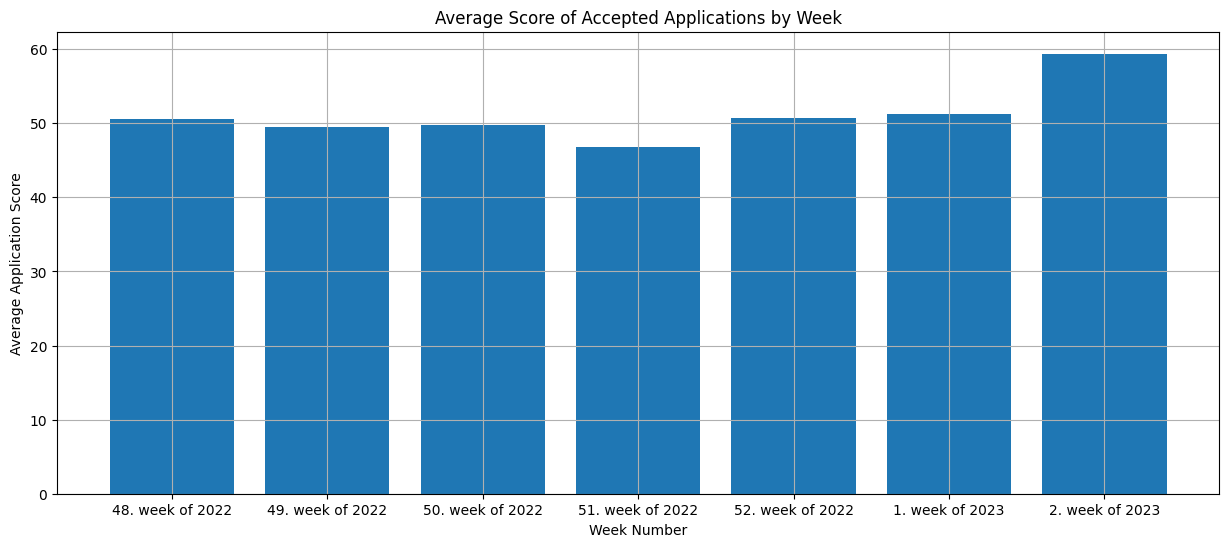

In [ ]:
# Group the data in the result table according to the week in which the application was made and show the average score of accepted applications for each week on a graph.

print(f"Rows with NaN application points : {merged_data['Application Points'].isna().sum()}")

# Take a copy of merged data to be safe
merged_data = merged_data.copy()

# Take this data as object to avoid warnings
merged_data['Week'] = merged_data['Applied at'].dt.isocalendar().week.astype(object)
merged_data['Year'] = merged_data['Applied at'].dt.isocalendar().year.astype(object)

# Turn week into string format
merged_data['Week'] = merged_data['Week'].astype(str) + '. week of ' + merged_data['Year'].astype(str)

weekly_avg_score = merged_data.groupby(['Week','Year'])['Application Points'].mean().reset_index()
weekly_avg_score = weekly_avg_score.sort_values(by=['Year','Week'])  # Sort by Week_Num and then by Week_Label

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

plt.bar(weekly_avg_score['Week'], weekly_avg_score['Application Points'])
plt.xlabel("Week Number")
plt.ylabel("Average Application Score")
plt.title("Average Score of Accepted Applications by Week")
plt.xticks(weekly_avg_score['Week'])  # Set x-axis ticks to week numbers
plt.grid(True)
plt.show()